# 对应分析

In [108]:
archaeology <- t(data.frame(P0 = c(30, 10, 10, 39),
           P1 = c(53, 4,  16, 2),
           P2 = c(73, 1,  41, 1),
           P3 = c(20, 6,  1,  4),
           P4 = c(46, 36, 37, 13),
           P5 = c(45, 6,  59, 10),
           P6 = c(16, 28, 169,5)))
colnames(archaeology) <- c('A','B','C','D')
archaeology

,A,B,C,D
P0,30,10,10,39
P1,53,4,16,2
P2,73,1,41,1
P3,20,6,1,4
P4,46,36,37,13
P5,45,6,59,10
P6,16,28,169,5


In [14]:
X <- as.matrix(archaeology)
P <- X /sum(X)
r <- apply(P, 1, sum)
c <- apply(P, 2, sum)
Ptilde <- P - r %o% c
Ptilde

,A,B,C,D
P0,-0.002880512,-0.0004738008,-0.03578426,0.0391385679
P1,0.033064409,-0.0060676010,-0.02045869,-0.0065381229
P2,0.039650076,-0.0160256148,-0.01083184,-0.0127926212
P3,0.011225308,0.0030575725,-0.01564362,0.0013607427
P4,-0.002344412,0.0264016880,-0.02468846,0.0006311879
P5,0.001942747,-0.0102203256,0.01003179,-0.0017542105
P6,-0.080657616,0.0033280816,0.09737508,-0.0200455439


In [15]:
P

,A,B,C,D
P0,0.03841229,0.012804097,0.01280410,0.049935980
P1,0.06786172,0.005121639,0.02048656,0.002560819
P2,0.09346991,0.001280410,0.05249680,0.001280410
P3,0.02560819,0.007682458,0.00128041,0.005121639
P4,0.05889885,0.046094750,0.04737516,0.016645327
P5,0.05761844,0.007682458,0.07554417,0.012804097
P6,0.02048656,0.035851472,0.21638924,0.006402049


In [16]:
r %o% c

,A,B,C,D
P0,0.04129280,0.013277898,0.04858835,0.010797412
P1,0.03479731,0.011189240,0.04094524,0.009098942
P2,0.05381983,0.017306024,0.06332864,0.014073031
P3,0.01438289,0.004624886,0.01692403,0.003760896
P4,0.06124326,0.019693062,0.07206362,0.016014139
P5,0.05567569,0.017902784,0.06551239,0.014558308
P6,0.10114417,0.032523391,0.11901417,0.026447593


In [18]:
apply(Ptilde,1,sum)

P0            P1            P2            P3            P4 
 5.204170e-18 -1.734723e-18 -1.040834e-17  1.301043e-18  1.040834e-17 
           P5            P6 
-1.040834e-17 -1.040834e-17

$$
\tilde{\mathbf{P}}\mathbf{1} = \mathbf{P}\mathbf{1} - \mathbf{r}\mathbf{c}' \mathbf{1} = \mathbf{r} - \mathbf{r} = \mathbf{0}
$$

所以$\tilde{\mathbf{P}}$矩阵不满秩。

In [19]:
Dr <- diag(r)
Dc <- diag(c)

In [27]:
Pstar <- solve(sqrt(Dr)) %*% Ptilde %*% solve(sqrt(Dc))
Pstar

-0.014175308,-0.004111792,-0.16234013,0.376656183
0.177250696,-0.057361001,-0.10110578,-0.068542134
0.170912114,-0.121819284,-0.04304296,-0.107836484
0.093599866,0.044959996,-0.12025009,0.022188623
-0.009473377,0.188137369,-0.09196785,0.004987775
0.008233481,-0.076384360,0.03919374,-0.014538723
-0.253615008,0.018454236,0.28225945,-0.123260740


In [32]:
res <- svd(Pstar)
res

0.58287068,-0.61565825,0.360032448,-0.369296203
0.22005447,0.45936749,0.002578257,-0.432569133
0.09947199,0.54746107,0.252330896,-0.437964683
0.26194471,0.10677294,-0.271619744,0.005821926
0.11429735,-0.13471027,-0.795238966,-0.226635616
-0.05767706,0.08225336,0.307417153,0.354392560
-0.71898370,-0.27188208,0.077533882,-0.554706691
0.475182733,0.6415934,0.01425899,-0.6019601
-0.005105499,-0.2966575,-0.89188059,-0.3413463
-0.691726534,-0.1067572,0.28938014,-0.6529751
0.543773580,-0.6992533,0.34728205,-0.3078154


## 奇异值分解

实对称矩阵$A$一定存在分解，

$$
A = P\Lambda P^T
$$

其中$P$为正交矩阵。协方差矩阵正定性还可进一步知道特征矩阵$\Lambda$全为非负元。

对一般的$m \times n$维矩阵$A$。存在分解
$$
A = U D V^T
$$

其中$U,D,V$分别为$(m,m),(m,n),(n,n)$维的正交矩阵。D是类对角矩阵（多余行列时置0），其值类似特征值，称为奇异值。

且奇异值可以看做$A^TA$特征值的算术平方根（因为$AA^T$是半正定的，所以可以做算术平方根）。


In [53]:
A <- Ptilde
A

,A,B,C,D
P0,-0.002880512,-0.0004738008,-0.03578426,0.0391385679
P1,0.033064409,-0.0060676010,-0.02045869,-0.0065381229
P2,0.039650076,-0.0160256148,-0.01083184,-0.0127926212
P3,0.011225308,0.0030575725,-0.01564362,0.0013607427
P4,-0.002344412,0.0264016880,-0.02468846,0.0006311879
P5,0.001942747,-0.0102203256,0.01003179,-0.0017542105
P6,-0.080657616,0.0033280816,0.09737508,-0.0200455439


In [55]:
res <- svd(A)
res

0.22113001,-0.660896925,0.55319511,0.33340416
0.24916710,0.305947613,-0.06458785,-0.21807083
0.22221082,0.561396152,0.11637472,0.77313314
0.13378234,-0.021371771,-0.12611506,0.02211287
0.11623230,-0.355281187,-0.76584630,0.26568581
-0.04461298,0.166586609,0.27127143,-0.31856437
-0.89790960,0.003619509,0.01570795,0.26644088
0.63087802,0.5930629,0.01640982,0.5
-0.02967435,-0.3683019,-0.78324527,0.5
-0.75907181,0.3812647,0.16866292,0.5
0.15786813,-0.6060258,0.59817253,0.5


In [59]:
res <- eigen(t(A) %*% A)
sqrt(res$values)

[1] 1.426236e-01 5.885347e-02 3.199589e-02 1.068965e-09

In [60]:
res <- eigen(A %*% t(A))
sqrt(res$values)

Warning message in sqrt(res$values):
"产生了NaNs"

[1] 1.426236e-01 5.885347e-02 3.199589e-02 9.050933e-10 8.065490e-10
[6]          NaN          NaN

In [63]:
res <- svd(A)
U <- res$u
D <- diag(res$d)
V <- res$v

U %*% D %*% t(V)

-0.002880512,-0.0004738008,-0.03578426,0.0391385679
0.033064409,-0.0060676010,-0.02045869,-0.0065381229
0.039650076,-0.0160256148,-0.01083184,-0.0127926212
0.011225308,0.0030575725,-0.01564362,0.0013607427
-0.002344412,0.0264016880,-0.02468846,0.0006311879
0.001942747,-0.0102203256,0.01003179,-0.0017542105
-0.080657616,0.0033280816,0.09737508,-0.0200455439


In [64]:
U

0.22113001,-0.660896925,0.55319511,0.33340416
0.24916710,0.305947613,-0.06458785,-0.21807083
0.22221082,0.561396152,0.11637472,0.77313314
0.13378234,-0.021371771,-0.12611506,0.02211287
0.11623230,-0.355281187,-0.76584630,0.26568581
-0.04461298,0.166586609,0.27127143,-0.31856437
-0.89790960,0.003619509,0.01570795,0.26644088


In [65]:
U %*% t(U)

0.9028663957,-0.25553692,0.0002562214,-0.01868588,-0.07457499,-0.07610650,-0.10342482
-0.2555369196,0.20741467,0.0510112584,0.03011884,-0.08821012,0.09179945,-0.28173968
0.0002562214,0.05101126,0.9758212101,0.02014944,-0.05734006,-0.13111594,0.01032904
-0.0186858826,0.03011884,0.0201494434,0.03474845,0.12560265,-0.05078447,-0.11629104
-0.0745749860,-0.08821012,-0.0573400637,0.12560265,0.79684418,-0.35676081,-0.04689236
-0.0761065039,0.09179945,-0.1311159405,-0.05078447,-0.35676081,0.20481286,-0.03995607
-0.1034248212,-0.28173968,0.0103290375,-0.11629104,-0.04689236,-0.03995607,0.87749223


In [66]:
t(U) %*% U

1.000000e+00,7.632783e-17,4.163336e-17,-2.775558e-17
7.632783e-17,1.000000e+00,-4.844893e-16,-2.821094e-16
4.163336e-17,-4.844893e-16,1.000000e+00,3.295975e-16
-2.775558e-17,-2.821094e-16,3.295975e-16,1.000000e+00


正如所见，R计算svd分解碰到奇异值为0的情况时，会缩短$U$矩阵。使得其关于其自身转置的两个乘法一个可以取得单位矩阵，另一个则不行。
不过这对其与其他项乘出原矩阵的性质并未变化。

$$
U D V^T = 
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}
\begin{bmatrix}
D_{11} & \mathbf{0} \\
\mathbf{0} & \mathbf{0}
\end{bmatrix}
V^T
=
\begin{bmatrix}
U_{11} & 0
\end{bmatrix}
\begin{bmatrix}
D_{11} & \mathbf{0} \\
\mathbf{0} & \mathbf{0}
\end{bmatrix}
V^T
=
U_{11}
D_{11}
V^T
$$

我们来看看为何两个乘法一个可以得到另一个不可以得到。

$$
UU^T = I \\
U^T U = I \\
U =
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix} 
\\
U^T U =
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}^T 
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}
= 
\begin{bmatrix}
U_{11}^T \\ U_{12}^T
\end{bmatrix}
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}
=
\begin{bmatrix}
U_{11}^T U_{11} & U_{11}^T U_{12} \\
U_{12}^T U_{11} & U_{12}^T U_{12}
\end{bmatrix}
=
\begin{bmatrix}
I_1 & 0 \\
0 & I_2
\end{bmatrix}
\\
U U^T = 
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}^T
= 
\begin{bmatrix}
U_{11} & U_{12}
\end{bmatrix}
\begin{bmatrix}
U_{11}^T \\ U_{12}^T
\end{bmatrix}
=
U_{11} U_{11}^T + U_{12} U_{12}^T
=
\begin{bmatrix}
I_1 & 0 \\
0 & I_2
\end{bmatrix}
$$

从上面的推理可以看出，若把本来正交的矩阵$U$分成两块$U_{11}$与$U_{12}$。则由上可知$U_{11}^TU_{11}$仍保持可导出单位矩阵性。
而$U_{11}U_{11}^T$则除非$U_{12}U_{12}^T$为零矩阵，否则不能得到此性质。上下划分有对偶的结论。

当然也许出于某种美学考虑，我们也可以强制R补完那个矩阵而不是主动截断。

In [68]:
svd(A,nu=7)

$d
[1] 1.426236e-01 5.885347e-02 3.199589e-02 1.134339e-17

$u
            [,1]         [,2]        [,3]        [,4]       [,5]        [,6]
[1,]  0.22113001 -0.660896925  0.55319511  0.33340416 0.30978246 -0.02759202
[2,]  0.24916710  0.305947613 -0.06458785 -0.21807083 0.77757548 -0.38386147
[3,]  0.22221082  0.561396152  0.11637472  0.77313314 0.01369742  0.15444061
[4,]  0.13378234 -0.021371771 -0.12611506  0.02211287 0.10350232 -0.21251520
[5,]  0.11623230 -0.355281187 -0.76584630  0.26568581 0.26692137  0.35385497
[6,] -0.04461298  0.166586609  0.27127143 -0.31856437 0.33016157  0.80465752
[7,] -0.89790960  0.003619509  0.01570795  0.26644088 0.32902457 -0.10093251
            [,7]
[1,] -0.02017701
[2,] -0.20152439
[3,]  0.01180125
[4,]  0.95361214
[5,] -0.08182579
[6,]  0.19674029
[7,]  0.06374346

$v
            [,1]       [,2]        [,3] [,4]
[1,]  0.63087802  0.5930629  0.01640982  0.5
[2,] -0.02967435 -0.3683019 -0.78324527  0.5
[3,] -0.75907181  0.3812647  0.16866292  0.5
[4,]  0.15786813 -0.6060258  0.59817253  0.5

In [69]:
Pstar

-0.014175308,-0.004111792,-0.16234013,0.376656183
0.177250696,-0.057361001,-0.10110578,-0.068542134
0.170912114,-0.121819284,-0.04304296,-0.107836484
0.093599866,0.044959996,-0.12025009,0.022188623
-0.009473377,0.188137369,-0.09196785,0.004987775
0.008233481,-0.076384360,0.03919374,-0.014538723
-0.253615008,0.018454236,0.28225945,-0.123260740


In [70]:
Ptilde

,A,B,C,D
P0,-0.002880512,-0.0004738008,-0.03578426,0.0391385679
P1,0.033064409,-0.0060676010,-0.02045869,-0.0065381229
P2,0.039650076,-0.0160256148,-0.01083184,-0.0127926212
P3,0.011225308,0.0030575725,-0.01564362,0.0013607427
P4,-0.002344412,0.0264016880,-0.02468846,0.0006311879
P5,0.001942747,-0.0102203256,0.01003179,-0.0017542105
P6,-0.080657616,0.0033280816,0.09737508,-0.0200455439


In [94]:
res <- svd(Pstar)
Lambda <- diag(res$d)
U <- res$u
V <- res$v

Utilde <- sqrt(Dr) %*% U
Vtilde <- sqrt(Dc) %*% V

Utilde %*% Lambda %*% t(Rtilde)

-0.002880512,-0.0004738008,-0.03578426,0.0391385679
0.033064409,-0.0060676010,-0.02045869,-0.0065381229
0.039650076,-0.0160256148,-0.01083184,-0.0127926212
0.011225308,0.0030575725,-0.01564362,0.0013607427
-0.002344412,0.0264016880,-0.02468846,0.0006311879
0.001942747,-0.0102203256,0.01003179,-0.0017542105
-0.080657616,0.0033280816,0.09737508,-0.0200455439


In [81]:
Utilde

0.19676221,-0.20783046,0.1215377326,-0.124664939
0.06819229,0.14235259,0.0007989717,-0.134048093
0.03833578,0.21098750,0.0972464839,-0.168788389
0.05218732,0.02127240,-0.0541148757,0.001159904
0.04698915,-0.05538117,-0.3269332568,-0.093172899
-0.02260832,0.03224176,0.1205017080,0.138915179
-0.37985844,-0.14364262,0.0409632362,-0.293066470


In [83]:
svd(Ptilde)

0.22113001,-0.660896925,0.55319511,0.33340416
0.24916710,0.305947613,-0.06458785,-0.21807083
0.22221082,0.561396152,0.11637472,0.77313314
0.13378234,-0.021371771,-0.12611506,0.02211287
0.11623230,-0.355281187,-0.76584630,0.26568581
-0.04461298,0.166586609,0.27127143,-0.31856437
-0.89790960,0.003619509,0.01570795,0.26644088
0.63087802,0.5930629,0.01640982,0.5
-0.02967435,-0.3683019,-0.78324527,0.5
-0.75907181,0.3812647,0.16866292,0.5
0.15786813,-0.6060258,0.59817253,0.5


In [91]:
t(Utilde) %*% solve(Dr) %*% Utilde

1.000000e+00,3.608225e-16,-1.318390e-16,1.665335e-16
3.330669e-16,1.000000e+00,-1.700029e-16,1.387779e-16
-1.318390e-16,-1.734723e-16,1.000000e+00,6.938894e-17
1.665335e-16,1.665335e-16,8.326673e-17,1.000000e+00


In [95]:
t(Vtilde) %*% solve(Dc) %*% Vtilde

1.000000e+00,1.665335e-16,-2.498002e-16,-2.775558e-16
1.665335e-16,1.000000e+00,2.775558e-17,-3.053113e-16
-2.498002e-16,-2.775558e-17,1.000000e+00,-3.608225e-16
-2.220446e-16,-2.775558e-16,-2.220446e-16,1.000000e+00


In [98]:
Y <- solve(Dr) %*% Utilde %*% Lambda
Z <- solve(Dc) %*% Vtilde %*% Lambda

In [102]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

In [112]:
df <- data.frame( x = c(Y[,1],Z[,1]), 
                  y = c(Y[,2],Z[,2]), 
                  group = c(rep(1,nrow(Y)), rep(2,nrow(Z))), 
                  label = c(rownames(archaeology),colnames(archaeology)))
df

x,y,group,label
0.919488569,-0.75219596,1,P0
0.378153987,0.61138660,1,P1
0.137448798,0.58588253,1,P2
0.700160979,0.22103785,1,P3
0.148053373,-0.13514502,1,P4
-0.078357694,0.08654646,1,P5
-0.724702773,-0.21224557,1,P6
0.420374688,0.43959523,2,A
-0.007965016,-0.35844365,2,B
-0.564132918,-0.06743125,2,C


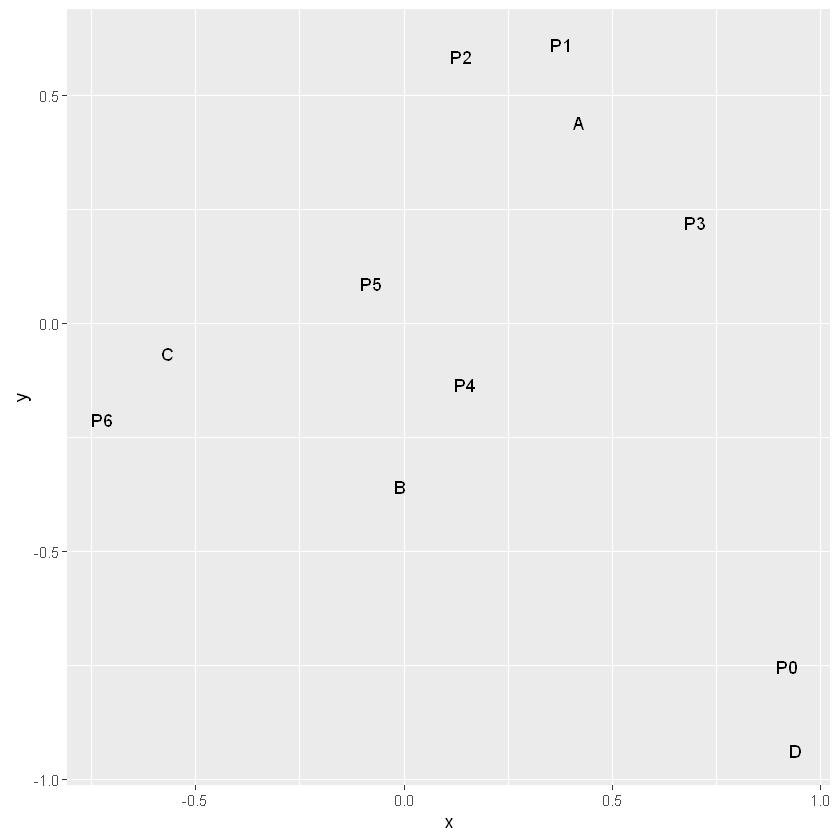

In [116]:
ggplot(df, aes(x,y,label = label)) + geom_text()

这个方法看上去取得了不错的效果，但并不能为何不直接从$\tilde{\mathbf{P}}$出发直接进行svd分解进行辩护。我们看看直接这样做会怎么样。

首先，矩阵$\tilde{\mathbf{P}}$刻画了与观测与理论频率（概率）的偏离程度。当这种偏离看起来不能由独立性检验的原假设下的随机性得到信服的解释时。
我们认为这个矩阵的表示的“歧异性”就有值得分析的价值，于是我们试图重现这个矩阵。因子分析中我们对一个`data.frame`是归约它的关系矩阵，
然后试图重现关系矩阵，这里我们则试图重现"raw"一点的$\tilde{\mathbf{P}}$矩阵。

重现一般联系着某些矩阵分解，正如因子得分貌似可以使得高维上远离的点在二维上远离，靠近的靠近，但好像并没有什么特别的证明。
它的实际来源只不过是表示相关矩阵的那些性质而已。这里这个的理论本身也只是表示$\tilde{\mathbf{P}}$。但导出的行列对应的两个数
为何有轮廓类似则坐标靠近这样的说法似乎没有解释。

总之，既然退化为讨论矩阵分解。$\tilde{\mathbf{P}}$作为非方阵，容易想到的就是svd分解。也容易发现行列对应性。
如果直接把什么前两列之类的东西打出来，似乎有点把因子分析载荷矩阵前两列打出来的感觉反应原变量之间关系的感觉。
当然，在因子分析中两变量如果和两个主要因子的载荷（相关系数）相差无几，似乎的确说明它们某种意义上是类似的，
这个类似性也的确反映在距离近上。

In [123]:
res <- svd(Ptilde)
Utilde <- res$u
Lambda <- diag(res$d)
Vtilde <- res$v



In [132]:
Y <- Utilde
Z <- Vtilde

df <- data.frame( x = c(Y[,1],Z[,1]), 
                  y = c(Y[,2],Z[,2]), 
                  group = c(rep(1,nrow(Y)), rep(2,nrow(Z))), 
                  label = c(rownames(archaeology),colnames(archaeology)))
df

x,y,group,label
0.22113001,-0.660896925,1,P0
0.24916710,0.305947613,1,P1
0.22221082,0.561396152,1,P2
0.13378234,-0.021371771,1,P3
0.11623230,-0.355281187,1,P4
-0.04461298,0.166586609,1,P5
-0.89790960,0.003619509,1,P6
0.63087802,0.593062933,2,A
-0.02967435,-0.368301878,2,B
-0.75907181,0.381264749,2,C


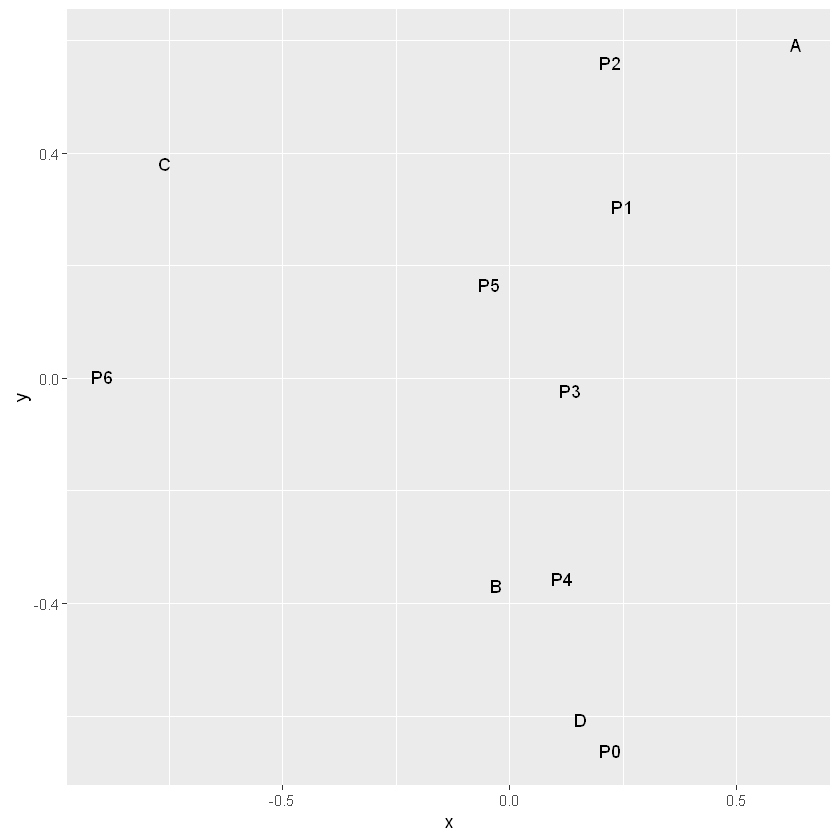

In [133]:
ggplot(df, aes(x,y,label = label)) + geom_text()

可以看出两者形状其实差不多，就是细节和尺度上有所不同。然后我们比较另一个想法，我们承认$\mathbf{P}^*$的合理性，
但不再做其他变化，直接用它svd分解结果了事。

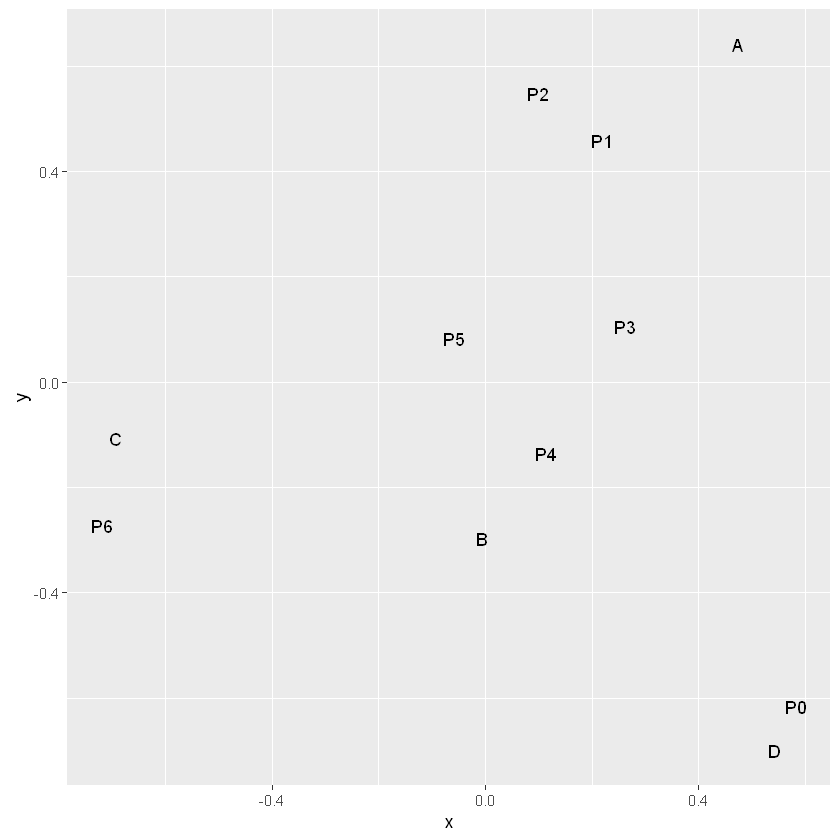

In [134]:
res <- svd(Pstar)
Ustar <- res$u
Lstar <- diag(res$d)
Vstar <- res$v

Y <- Ustar
Z <- Vstar

df <- data.frame( x = c(Y[,1],Z[,1]), 
                  y = c(Y[,2],Z[,2]), 
                  group = c(rep(1,nrow(Y)), rep(2,nrow(Z))), 
                  label = c(rownames(archaeology),colnames(archaeology)))

ggplot(df, aes(x,y,label = label)) + geom_text()

In [135]:
GSS93 <- read.csv("例7-1GSS93 subset.csv")

In [136]:
head(GSS93)

id,wrkstat,marital,agewed,sibs,childs,age,birthmo,zodiac,educ,...,region4,filter_.,sexfreq5,married,classic3,jazz3,opera3,rap3,hvymetl3,blues3
1,1,3,20,3,1,43,5,2,11,...,1,1,1,2,1,1,1,3,3,1
2,1,5,0,2,0,44,8,6,16,...,1,1,1,2,1,1,1,3,3,1
3,1,3,25,2,0,43,2,11,16,...,1,1,4,2,1,2,1,3,3,2
4,2,5,0,4,0,45,99,99,15,...,1,1,NA,2,1,1,3,3,3,2
5,5,5,0,1,0,78,10,7,17,...,1,1,NA,2,1,1,1,NA,NA,1
6,5,1,25,2,2,83,3,12,11,...,1,1,1,1,NA,1,3,2,3,1


In [173]:
rd <- GSS93[,c('race','degree')]
rd <- subset(GSS93, degree %in% 0:4, select = c(race,degree))
head(rd)

race,degree
1,1
2,3
1,3
1,1
1,4
1,1


In [174]:
tab <- table(rd)
tab

    degree
race   0   1   2   3   4
   1 214 658  74 209  99
   2  48  92  13   7   7
   3  17  30   3  18   7

In [175]:
tab[1,3]

[1] 74

In [176]:
correspond <- function(X, method = 3){
    P <- X /sum(X)
    r <- apply(P, 1, sum)
    c <- apply(P, 2, sum)
    Ptilde <- P - r %o% c
    
    if(method == 1){
        res <- svd(Ptilde)
        Y <- res$u
        Z <- res$v
        df <- data.frame( x = c(Y[,1],Z[,1]), 
                          y = c(Y[,2],Z[,2]),
                          group = c(rep(1,nrow(Y)), rep(2,nrow(Z))))
        return(df)
    }

    
    Dr <- diag(r)
    Dc <- diag(c)
    Pstar <- solve(sqrt(Dr)) %*% Ptilde %*% solve(sqrt(Dc))
    
    if(method == 2){
        res <- svd(Pstar)
        Y <- res$u
        Z <- res$v
        df <- data.frame( x = c(Y[,1],Z[,1]), 
                          y = c(Y[,2],Z[,2]),
                          group = c(rep(1,nrow(Y)), rep(2,nrow(Z))))
        return(df)
    }
    
    res <- svd(Pstar)
    
    Lambda <- diag(res$d)
    U <- res$u
    V <- res$v

    Utilde <- sqrt(Dr) %*% U
    Vtilde <- sqrt(Dc) %*% V
    
    Y <- solve(Dr) %*% Utilde %*% Lambda
    Z <- solve(Dc) %*% Vtilde %*% Lambda
    
    df <- data.frame( x = c(Y[,1],Z[,1]), 
                      y = c(Y[,2],Z[,2]),
                      group = c(rep(1,nrow(Y)), rep(2,nrow(Z))))
    return(df)
}

In [184]:
correspond(tab)

x,y,group
-0.04287909,-0.01939985,1
0.39898571,0.03283730,1
-0.17146986,0.25124782,1
0.17552155,0.10129652,2
0.02977336,-0.04714672,2
0.11555232,-0.04721130,2
-0.27434151,0.04969363,2
-0.16281002,0.01003025,2


In [163]:
rownames(tab)

[1] "1" "2" "3"

In [172]:
unique(GSS93$degree)

[1] 1 3 4 0 2 8 9

In [182]:
colnames(tab) <- c('Less than HS','High school',"Junior college",
                   'Bachelor','Graduate')
rownames(tab) <- c('white','black','other')

In [183]:
tab

       degree
race    Less than HS High school Junior college Bachelor Graduate
  white          214         658             74      209       99
  black           48          92             13        7        7
  other           17          30              3       18        7

In [185]:
df <- correspond(tab)
df$label <- c(c('white','black','other'),c('Less than HS','High school',"Junior college",'Bachelor','Graduate'))
df

x,y,group,label
-0.04287909,-0.01939985,1,white
0.39898571,0.03283730,1,black
-0.17146986,0.25124782,1,other
0.17552155,0.10129652,2,Less than HS
0.02977336,-0.04714672,2,High school
0.11555232,-0.04721130,2,Junior college
-0.27434151,0.04969363,2,Bachelor
-0.16281002,0.01003025,2,Graduate


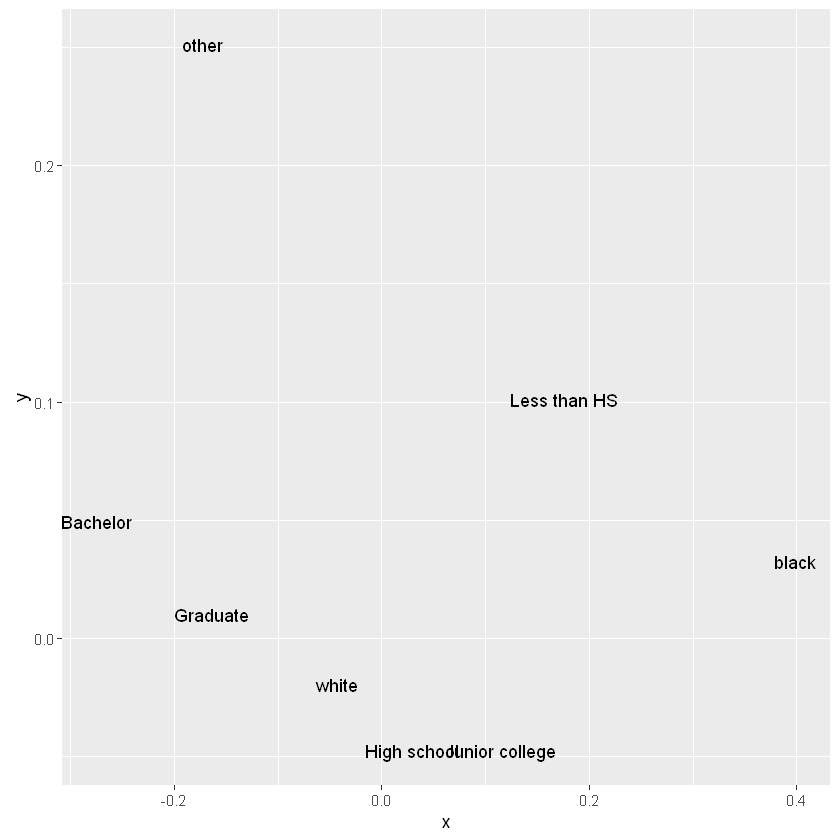

In [186]:
ggplot(df, aes(x,y,label = label)) + geom_text()

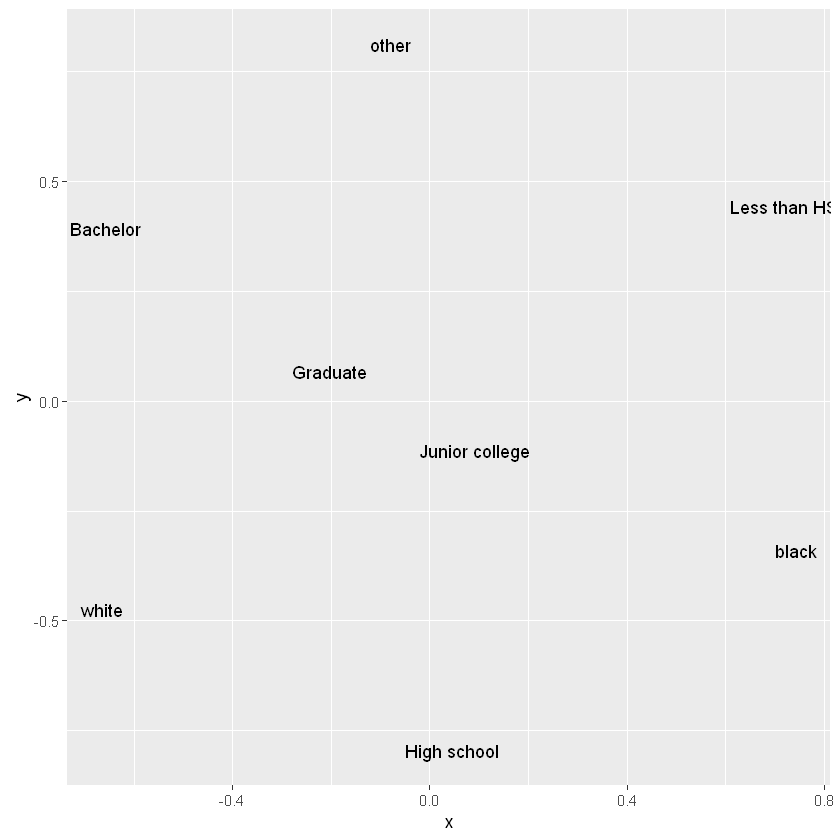

In [187]:
df <- correspond(tab,method=1)
df$label <- c(c('white','black','other'),c('Less than HS','High school',"Junior college",'Bachelor','Graduate'))

ggplot(df, aes(x,y,label = label)) + geom_text()

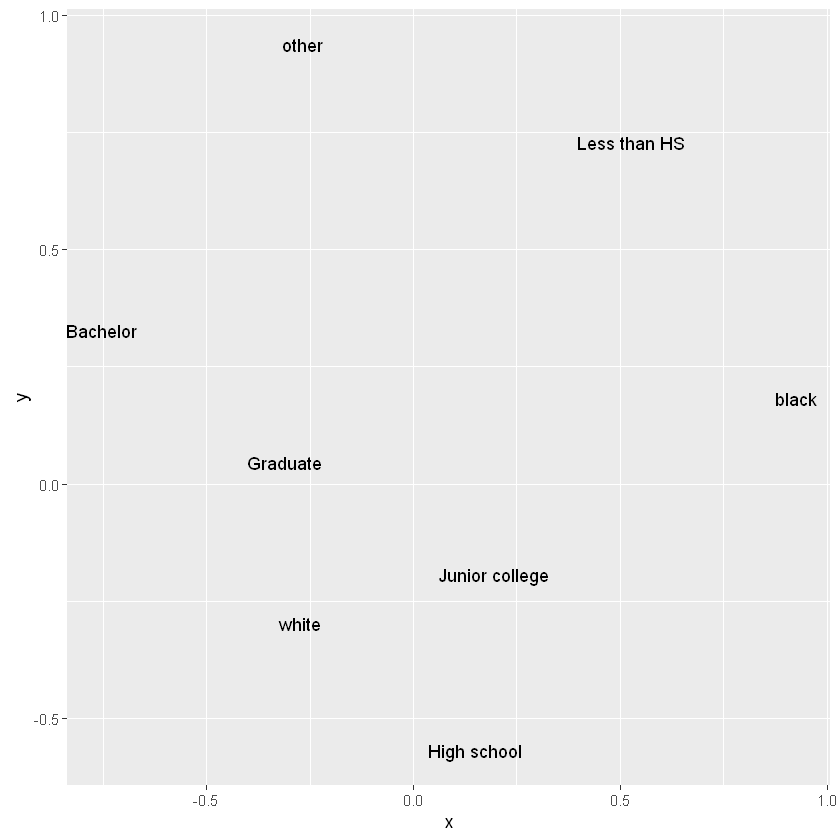

In [188]:
df <- correspond(tab,method=2)
df$label <- c(c('white','black','other'),c('Less than HS','High school',"Junior college",'Bachelor','Graduate'))

ggplot(df, aes(x,y,label = label)) + geom_text()